In [119]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None) # this will show the entire coloumns 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 


In [120]:
card=pd.read_csv('BankChurners.csv')
card.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [121]:
# lets drop the last 2 columns as they were some sort of analysis and we dont need them.

card=card.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)


In [122]:
# we drop the rows with 'Unknown' values for 'Marital_Status'

card.drop(card[card['Marital_Status'].str.contains('Unknown')].index, inplace=True)
card.drop(card[card['Income_Category'].str.contains('Unknown')].index, inplace=True)    
               

In [123]:
card['Marital_Status'].value_counts()

Married     4194
Single      3499
Divorced     655
Name: Marital_Status, dtype: int64

In [124]:
card['Income_Category'].value_counts()

Less than $40K    3311
$40K - $60K       1658
$80K - $120K      1399
$60K - $80K       1300
$120K +            680
Name: Income_Category, dtype: int64

In [125]:
card['Attrition_Flag'].value_counts()

Existing Customer    7020
Attrited Customer    1328
Name: Attrition_Flag, dtype: int64

In [126]:
card['Attrition']= np.where(card['Attrition_Flag'] == 'Attrited Customer', 1 ,0)
card.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0


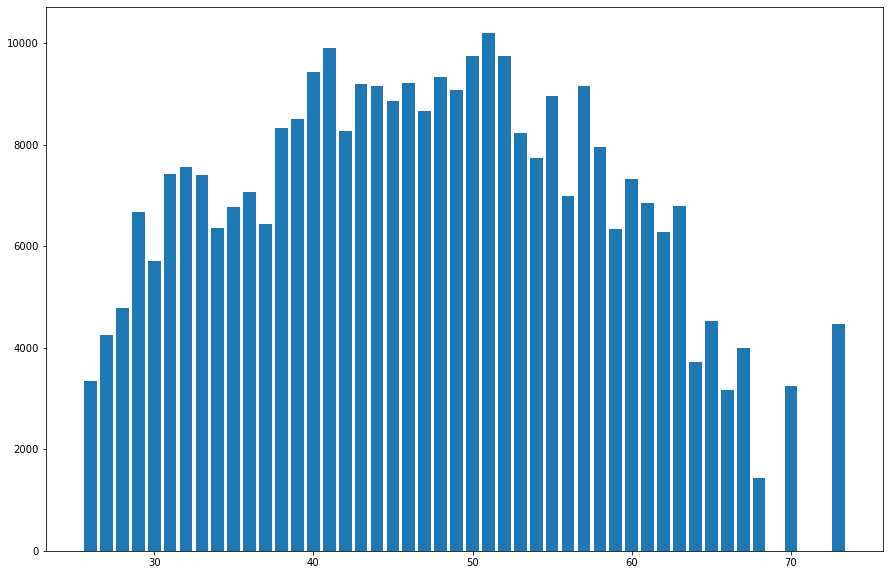

In [130]:
# we want a bar chart to plt the cavg credit limit against each age:
plt.subplots(figsize=(15,10))

grp = card.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()
x= grp['Customer_Age']
y =grp['Credit_Limit']
plt.bar(x=x, height=y)

plt.show()

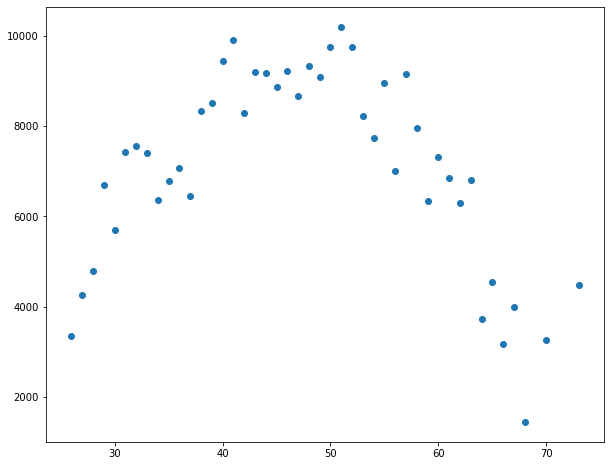

In [134]:
plt.scatter(x=grp['Customer_Age'], y=grp['Credit_Limit'])

In [135]:
# to get the averag eof a column:
#(card['Months_on_book']).mean()

In [136]:
pd.pivot_table(card, values='Months_on_book', index='Gender') # default function for 'values' is mean 

,Months_on_book
Gender,
F,36.063782
M,35.918391


In [137]:
card['Attrition'].value_counts(normalize=True)


0    0.84092
1    0.15908
Name: Attrition, dtype: float64

In [138]:
card['Marital_Status'].value_counts()

Married     4194
Single      3499
Divorced     655
Name: Marital_Status, dtype: int64

In [139]:
card[['Attrition','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt','Avg_Utilization_Ratio']].corr()



,Attrition,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Avg_Utilization_Ratio
Attrition,1.000000,-0.018300,-0.265673,0.005451,-0.160422,-0.185231
Credit_Limit,-0.018300,1.000000,0.045030,0.996004,0.167746,-0.482457
Total_Revolving_Bal,-0.265673,0.045030,1.000000,-0.044371,0.057583,0.625420
Avg_Open_To_Buy,0.005451,0.996004,-0.044371,1.000000,0.162603,-0.538385
Total_Trans_Amt,-0.160422,0.167746,0.057583,0.162603,1.000000,-0.091037
Avg_Utilization_Ratio,-0.185231,-0.482457,0.625420,-0.538385,-0.091037,1.000000


In [140]:
# story:
#no correlation
# weak (or negligible) correlation 0-0.3
# low correlation 0.3 - 0.5
# moderaye correlation 0.5 -0.7
# strong (high) correlation 0.7 - 0.9
# very high correlation 0.9 - 1.0

# there is a very high correlation between Avg_Open_To_Buy AND Credit limit.
#Total_Revolving_Balance has a negligible correlation with Credit Limit 
#AND Total Transaction amount.



In [141]:
# we 
card[['Attrition','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt','Avg_Utilization_Ratio']].corr()['Attrition']



Attrition                1.000000
Credit_Limit            -0.018300
Total_Revolving_Bal     -0.265673
Avg_Open_To_Buy          0.005451
Total_Trans_Amt         -0.160422
Avg_Utilization_Ratio   -0.185231
Name: Attrition, dtype: float64

In [142]:
# we are just interested in the correlation between Attrition and the selected variables:
#it seems tha tAttrion is negatively correlated with the variables which is reasonable 
# at this stage. 
#For example: the higher the credit limit, th elower the chance of attrition.

In [143]:
card.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition'],
      dtype='object')

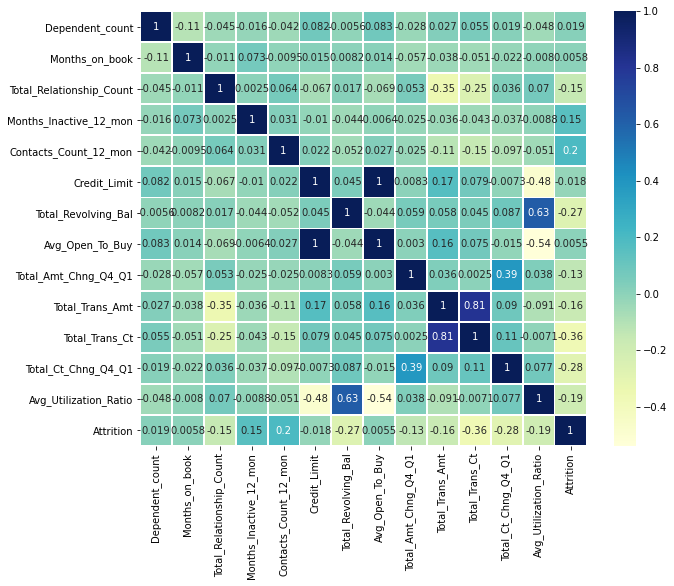

In [144]:

sns.heatmap(card[['Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition']]
            .corr(), annot=True, cmap='YlGnBu', linewidths=.8)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

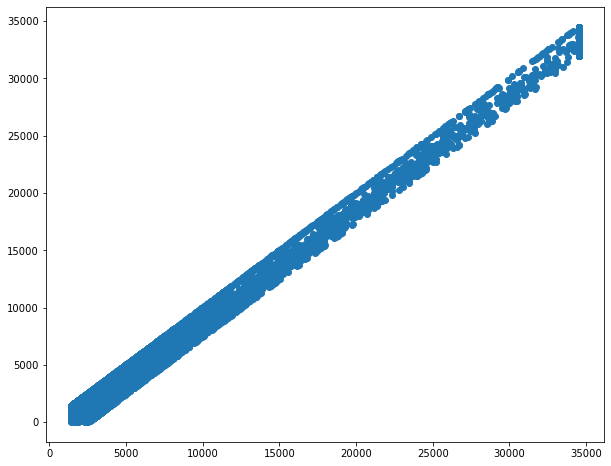

In [145]:
plt.scatter(x=card['Credit_Limit'], y=card['Avg_Open_To_Buy'])
plt.show

In [146]:
card2=card[['Credit_Limit','Avg_Open_To_Buy']]
card2.head()

,Credit_Limit,Avg_Open_To_Buy
0,12691.0,11914.0
1,8256.0,7392.0
2,3418.0,3418.0
4,4716.0,4716.0
5,4010.0,2763.0


In [147]:
#sns.pairplot(card)
#plt.show()

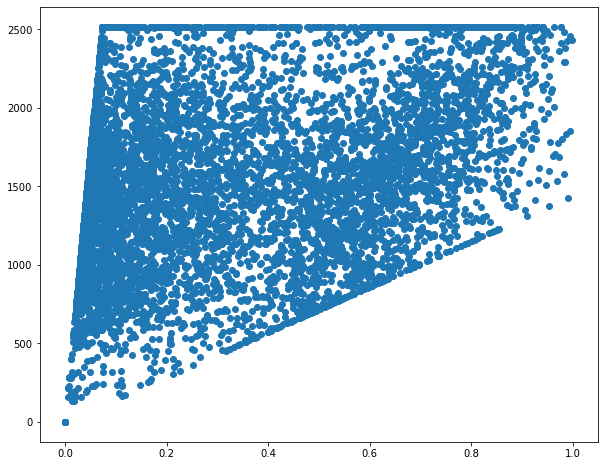

In [148]:
plt.scatter(x=card['Avg_Utilization_Ratio'], y=card['Total_Revolving_Bal'])
plt.show()

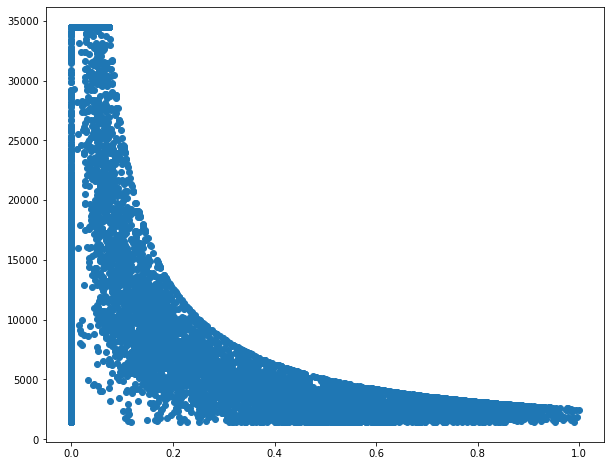

In [149]:
plt.scatter(x=card['Avg_Utilization_Ratio'], y=card['Credit_Limit'])
plt.show()

In [150]:
# pi chart for gender:
#fig, ax = plt.subplots()
#ax.pie(card['Gender'].value_counts(),  autopct='%1.1f%%', shadow=True, startangle=90)

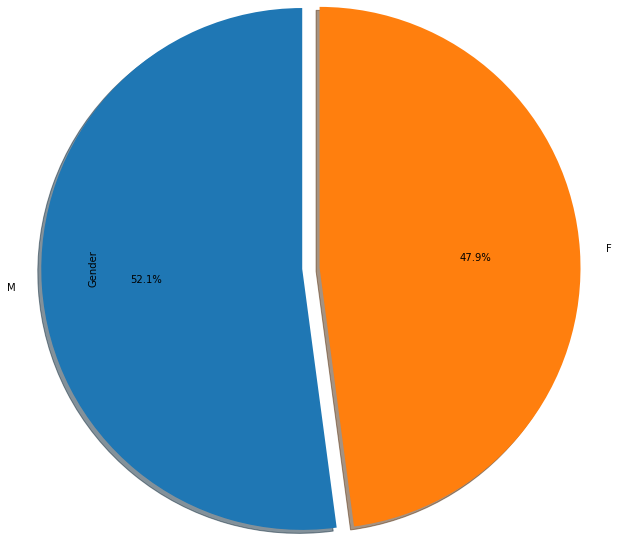

In [151]:
# to depict a pie chart for Gender:
card['Gender'].value_counts().plot.pie(autopct="%1.1f%%",explode=(0.1,0),
                              radius=1.5,startangle=90,shadow=True)

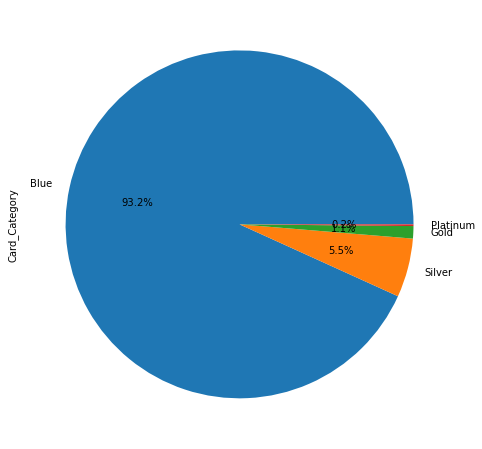

In [152]:
card['Card_Category'].value_counts().plot.pie(autopct="%1.1f%%")

plt.rcParams['figure.figsize'] = (10, 8)
#grid=True

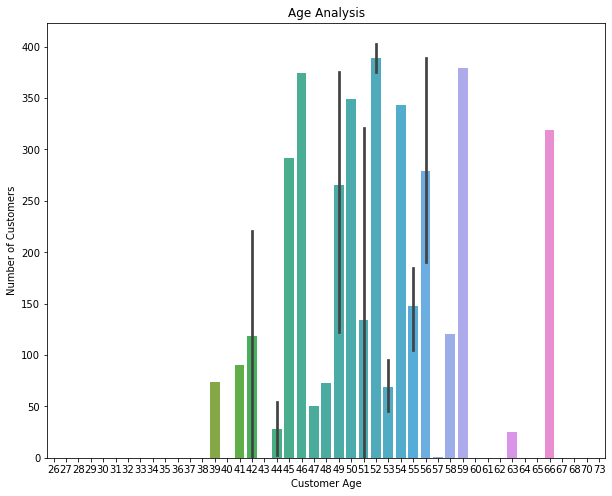

In [153]:
#plt.subplots(figsize=(10,8))
sns.barplot(x=card['Customer_Age'], y=card['Customer_Age'].value_counts())
plt.xlabel ('Customer Age')
plt.ylabel ('Number of Customers')
plt.title('Age Analysis')
plt.show()


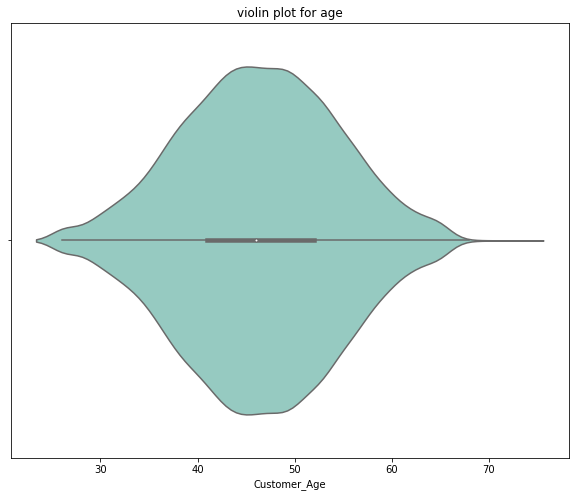

In [154]:
sns.violinplot(card['Customer_Age'], grid=True, palette='Set3')
#plt.xticks(rotation=90)
plt.title ('violin plot for age')
plt.show()

In [155]:
# lets take the numeric columns:
num = card.select_dtypes(include=np.number)
num= num.drop(num[['CLIENTNUM', 'Attrition', 'Customer_Age', 'Dependent_count']], axis=1)
num.head()


,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [164]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num= pd.DataFrame(scaler.fit_transform(num), columns=num.columns, index=num.index)
#num.head()

In [157]:
# we extract the desired columns form the original dataframe:
num1= card[['Attrition','CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']]

In [158]:
# now we should merge num1 and num

card1=pd.concat([num1, num], axis=1)
#card1.head()
card1.head()

,Attrition,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061
1,0,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105
2,0,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000
4,0,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000
5,0,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,0.534884,0.4,0.166667,0.333333,0.077747,0.495431,0.079970,0.405063,0.032158,0.108527,0.227787,0.311311


In [159]:
# to normalise our data, especially, credit limit, total revolving balance, total 
# transaction amount, we use log form:

# from sklearn import preprocessing

#card['Credit_Limit']=(card['Credit_Limit']-min(card['Credit_Limit']))/(card['Credit_Limit'].max()-card['Credit_Limit'].min())
# the returned values are between 0 & 1.
# formula = (x-xmin)/(xmax-xmin)


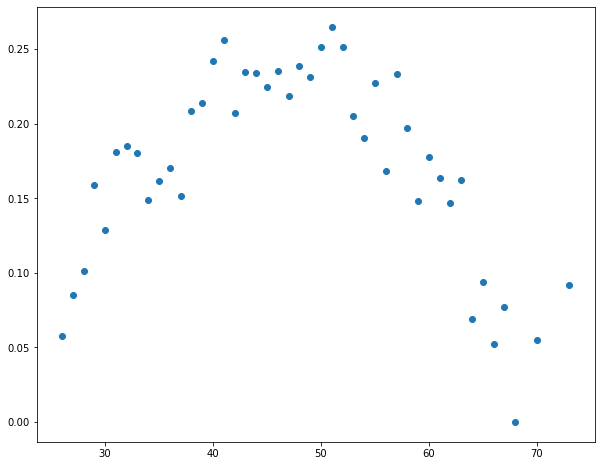

In [160]:
# scatter between the mean of credit limit for each age category:

plt.scatter(x = card1.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Customer_Age'], 
            y = card1.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Credit_Limit'])



In [161]:
# when there is a U-shape relationship between x and y and we want to use regression, then we should 
# square the independent variable. In this case y= credit limit, x= customer age:
# to know more about this type of regression : 
#https://www.theanalysisfactor.com/regression-modelshow-do-you-know-you-need-a-polynomial/

In [162]:
Y = card.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Credit_Limit']
X = card.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Customer_Age']

sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Credit_Limit   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              196.5
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                    7.78e-18
Time:                        20:26:31   Log-Likelihood:                         -426.58
No. Observations:                  45   AIC:                                      855.2
Df Residuals:                      44   BIC:                                      857.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Customer_Age   134.2673      9.578     14.018      0.000     114.964     153.571
==============================================================================
Omnibus:                        9.463   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.587
Skew:                          -1.127   Prob(JB):                      0.00829
Kurtosis:                       3.177   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
# now we want to regress the credit limit on some of the variable:
gen=pd.get_dummies(card1['Gender'])
Y=card1['Credit_Limit']
X=card1[['Customer_Age','Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct']]
X=pd.concat([gen, X], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y, X).fit().summary()
print(model)



                            OLS Regression Results                            
Dep. Variable:           Credit_Limit   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     475.4
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:26:32   Log-Likelihood:                 161.56
No. Observations:                8348   AIC:                            -309.1
Df Residuals:                    8341   BIC:                            -259.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

### Logistic Regression

In [230]:

Y= card1['Attrition'] # dependent variable
X=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.245234
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8337
Method:                           MLE   Df Model:                           10
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                  0.4403
Time:                        20:34:46   Log-Likelihood:                -2047.2
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.0129      0.281     14.301      0.000       3.463       4.563
Months_on_book              -0.7097      0.212     -3.355      0.001      -1.124      -0.295
Total_Relationship_Count    -2.2760      0.148    -15.371      0.000      -2.566      -1.986
Months_Inactive_12_mon       3.0664      0.246     12.448      0.000       2.584       3.549
Contacts_Count_12_mon        2.7564      0.231     11.932      0.000       2.304       3.209
Credit_Limit                -0.2661      0.150     -1.771      0.077      -0.561       0.028
Total_Revolving_Bal         -2.5215      0.126    -20.055      0.000      -2.768      -2.275
Total_Amt_Chng_Q4_Q1        -1.4525      0.671     -2.165      0.030      -2.767      -0.138
Total_Trans_Amt              7.8569      0.424     18.532      0.000       7.026       8.688
Total_Trans_Ct             -13.7549      0.493    -27.926      0.000     -14.720     -12.789
Total_Ct_Chng_Q4_Q1        -10.0443      0.746    -13.465      0.000     -11.506      -8.582
============================================================================================
"""

In [231]:
# customers who have longer relationship with the bank are less likely to have churned.
# customers who were inactive in the last 12 months are very likely to churn. 
# when the p-value is less than 5%, the intervals will NOT contain the ZERO.


In [232]:
# we try to eliminate some of the variables which we think not relvant to the DV.
Y= card1['Attrition'] # dependent variable
X=card1[['Months_Inactive_12_mon',
        'Total_Revolving_Bal'
         , 'Total_Trans_Amt',
       'Total_Trans_Ct',]]

X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.293389
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8343
Method:                           MLE   Df Model:                            4
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                  0.3304
Time:                        20:34:47   Log-Likelihood:                -2449.2
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.5083      0.134     11.248      0.000       1.245       1.771
Months_Inactive_12_mon     2.9210      0.220     13.251      0.000       2.489       3.353
Total_Revolving_Bal       -2.7305      0.117    -23.321      0.000      -2.960      -2.501
Total_Trans_Amt            8.0539      0.384     20.968      0.000       7.301       8.807
Total_Trans_Ct           -13.5495      0.435    -31.123      0.000     -14.403     -12.696
==========================================================================================
"""

In [288]:
# this tme we remove the +ve signs:

Y= card1['Attrition'] # dependent variable
X=card1[['Months_on_book',
       'Total_Relationship_Count','Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.283321
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8340
Method:                           MLE   Df Model:                            7
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                  0.3534
Time:                        20:47:33   Log-Likelihood:                -2365.2
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        5.5084      0.232     23.711      0.000       5.053       5.964
Months_on_book              -0.4974      0.197     -2.528      0.011      -0.883      -0.112
Total_Relationship_Count    -2.5358      0.137    -18.497      0.000      -2.804      -2.267
Credit_Limit                 0.0389      0.139      0.279      0.780      -0.234       0.312
Total_Revolving_Bal         -2.4527      0.118    -20.758      0.000      -2.684      -2.221
Total_Amt_Chng_Q4_Q1        -0.6448      0.608     -1.061      0.289      -1.836       0.547
Total_Trans_Ct              -7.6078      0.273    -27.897      0.000      -8.142      -7.073
Total_Ct_Chng_Q4_Q1         -9.8534      0.713    -13.813      0.000     -11.251      -8.455
============================================================================================
"""

### Logistic regression: educational level as dummy variable

In [168]:
card1['Education_Level'].value_counts()

Graduate         2591
High School      1653
Unknown          1267
Uneducated       1204
College           844
Post-Graduate     431
Doctorate         358
Name: Education_Level, dtype: int64

In [178]:
edu=pd.get_dummies(card1['Education_Level'])
edu.drop(['Unknown'], axis=1, inplace=True)

Y= card1['Attrition'] # dependent variable
X=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]
X=pd.concat([edu, X], axis=1)
X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.244631
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8331
Method:                           MLE   Df Model:                           16
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.4417
Time:                        20:45:18   Log-Likelihood:                -2042.2
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.1211      0.298     13.839      0.000       3.537

In [ ]:
# It seems that Educational Level has no impact(relationship) with Attrion nor with credit limit. 

### Logistic Regression, Marital status as Dummy Variable

In [289]:
card1['Marital_Status'].value_counts()

Married     4194
Single      3499
Divorced     655
Name: Marital_Status, dtype: int64

In [290]:
# to perform the Logistic regression with dummy variables:

marital=pd.get_dummies(card1['Marital_Status'])
marital.drop(['Single'], axis=1, inplace=True)


In [291]:
Y= card1['Attrition'] # dependent variable
ivs=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=pd.concat([marital, ivs], axis=1)
X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.242354
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8335
Method:                           MLE   Df Model:                           12
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                  0.4469
Time:                        20:47:36   Log-Likelihood:                -2023.2
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.3526      0.288     15.091      0.000       3.787       4.918
Divorced                    -0.0248      0.161     -0.154      0.877      -0.340       0.290
Married                     -0.5804      0.087     -6.652      0.000      -0.751      -0.409
Months_on_book              -0.6747      0.212     -3.176      0.001      -1.091      -0.258
Total_Relationship_Count    -2.2597      0.149    -15.185      0.000      -2.551      -1.968
Months_Inactive_12_mon       3.0690      0.248     12.360      0.000       2.582       3.556
Contacts_Count_12_mon        2.7901      0.233     11.998      0.000       2.334       3.246
Credit_Limit                -0.3194      0.152     -2.103      0.035      -0.617      -0.022
Total_Revolving_Bal         -2.4782      0.126    -19.613      0.000      -2.726      -2.231
Total_Amt_Chng_Q4_Q1        -1.3091      0.681     -1.924      0.054      -2.643       0.025
Total_Trans_Amt              8.1032      0.430     18.829      0.000       7.260       8.947
Total_Trans_Ct             -14.2765      0.505    -28.273      0.000     -15.266     -13.287
Total_Ct_Chng_Q4_Q1         -9.9896      0.751    -13.297      0.000     -11.462      -8.517
============================================================================================
"""

In [292]:
# When the categirical variable (Divorced) is not significant, then
# the impact of 'Divorced'  is not different from the 
# base variable (single)

# when the 'Married' category is significant and negative, then 
# 'Married' group are less likely to churn as compared to the 'single' group.



In [293]:
#card1.info()

In [294]:
card1['Income_Category'].value_counts()

Less than $40K    3311
$40K - $60K       1658
$80K - $120K      1399
$60K - $80K       1300
$120K +            680
Name: Income_Category, dtype: int64

In [314]:
# doing a cross tab to compare income with card categories:

pd.crosstab(card['Card_Category'], card['Income_Category'])


Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K
Card_Category,,,,,
Blue,600,1554,1185,1274,3169
Gold,18,13,26,17,22
Platinum,4,1,4,0,4
Silver,58,90,85,108,116


In [295]:
income=pd.get_dummies(card1['Income_Category'])
income.drop(['Less than $40K'], axis=1, inplace=True)




In [297]:
ivs=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=pd.concat([income, ivs], axis=1)
X=sm.add_constant(X)

model1=sm.Logit(Y, X).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.243318
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8333
Method:                           MLE   Df Model:                           14
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                  0.4447
Time:                        20:47:51   Log-Likelihood:                -2031.2
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.2759      0.287     14.883      0.000       3.713       4.839
$120K +                     -0.1893      0.174     -1.086      0.278      -0.531       0.152
$40K - $60K                 -0.4052      0.114     -3.543      0.000      -0.629      -0.181
$60K - $80K                 -0.6489      0.131     -4.943      0.000      -0.906      -0.392
$80K - $120K                -0.4086      0.135     -3.034      0.002      -0.673      -0.145
Months_on_book              -0.7425      0.213     -3.491      0.000      -1.159      -0.326
Total_Relationship_Count    -2.2817      0.149    -15.361      0.000      -2.573      -1.991
Months_Inactive_12_mon       3.0819      0.247     12.464      0.000       2.597       3.567
Contacts_Count_12_mon        2.7820      0.232     12.004      0.000       2.328       3.236
Credit_Limit                -0.0158      0.190     -0.083      0.934      -0.388       0.356
Total_Revolving_Bal         -2.5123      0.126    -19.928      0.000      -2.759      -2.265
Total_Amt_Chng_Q4_Q1        -1.4888      0.676     -2.203      0.028      -2.814      -0.164
Total_Trans_Amt              7.9777      0.428     18.627      0.000       7.138       8.817
Total_Trans_Ct             -13.9885      0.498    -28.078      0.000     -14.965     -13.012
Total_Ct_Chng_Q4_Q1         -9.9894      0.752    -13.285      0.000     -11.463      -8.516
============================================================================================
"""

here the '40-60k' category is significant and negative, means 
 '40-60k' group are less likely to churn as compared to the 'less than 40k' group.

 Here the categirical variable (120k+) is not significant, means there is no difference 
 between the impact of '120k+' group and the base variable (less than 40k).

 question for Cristina:
 we can not find a difference between the 120k+ and 'less than 40k' groups. the likelihood of to churn for this
 two gropus are roughly equal.



### At this point we are interested to predict the number of churn when the income categories are used.

In [299]:
Y_predi=model1.predict(X)

churn_income_cat=Y_predi.to_frame('churn_income_cat')
churn_income_cat=pd.concat([Y, churn_income_cat], axis=1)
churn_income_cat['churned1']=np.where(churn_income_cat['churn_income_cat']>0.5, 1,0)
churn_income_cat

,Attrition,churn_income_cat,churned1
0,0,0.003443,0
1,0,0.000021,0
2,0,0.005112,0
4,0,0.000663,0
5,0,0.200344,0
...,...,...,...
10121,0,0.017583,0
10122,0,0.010857,0
10123,1,0.083613,0
10124,1,0.859057,1


In [300]:
churn_income_cat['churned1'].value_counts(normalize=True)

0    0.881289
1    0.118711
Name: churned1, dtype: float64

In [301]:
#card1['Card_Category'].value_counts()

### Logistic Regression: Card Category as Dummy Variable

In [315]:
typ=pd.get_dummies(card1['Card_Category'])
typ.drop(['Platinum'], axis=1, inplace=True)

In [316]:
ivs=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=pd.concat([typ, ivs], axis=1)
X=sm.add_constant(X)

model2=sm.Logit(Y, X).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.244672
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8334
Method:                           MLE   Df Model:                           13
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                  0.4416
Time:                        20:57:26   Log-Likelihood:                -2042.5
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        5.4293      1.006      5.399      0.000       3.458       7.400
Blue                        -1.3899      0.959     -1.450      0.147      -3.269       0.489
Gold                        -0.6094      1.015     -0.600      0.548      -2.600       1.381
Silver                      -0.9431      0.968     -0.974      0.330      -2.841       0.955
Months_on_book              -0.7060      0.212     -3.334      0.001      -1.121      -0.291
Total_Relationship_Count    -2.2649      0.148    -15.279      0.000      -2.555      -1.974
Months_Inactive_12_mon       3.0705      0.247     12.440      0.000       2.587       3.554
Contacts_Count_12_mon        2.7484      0.231     11.883      0.000       2.295       3.202
Credit_Limit                -0.4894      0.171     -2.858      0.004      -0.825      -0.154
Total_Revolving_Bal         -2.5264      0.126    -20.059      0.000      -2.773      -2.280
Total_Amt_Chng_Q4_Q1        -1.4427      0.672     -2.148      0.032      -2.759      -0.126
Total_Trans_Amt              7.8057      0.426     18.329      0.000       6.971       8.640
Total_Trans_Ct             -13.8050      0.494    -27.949      0.000     -14.773     -12.837
Total_Ct_Chng_Q4_Q1        -10.0123      0.746    -13.414      0.000     -11.475      -8.549
============================================================================================
"""

#### Here the categorical variables of 'Gold' and 'Silver' are significant with positive coefficients.
#### it means these type of card holders are more likely to churn as compared to 'Blue' holders.

In [317]:
# we would like to predict the probability of churn between customers: 
Y_pred=model2.predict(X)

#residuals= Y-Y_pred
#residuals.hist(bins=100)
#plt.show()
#df=pd.concat([Y, Y_pred], axis=1)
prob=Y_pred.to_frame(name='Prob_to_Churn')


In [318]:
# To see the probability to churn after prediction, we concat the predicted values and actual values:
prob_churn=pd.concat([Y, prob], axis=1)
prob_churn

,Attrition,Prob_to_Churn
0,0,0.004694
1,0,0.000016
2,0,0.006194
4,0,0.001009
5,0,0.228242
...,...,...
10121,0,0.014016
10122,0,0.012516
10123,1,0.093883
10124,1,0.817953


In [319]:
prob_churn['Attrition'].value_counts()

0    7020
1    1328
Name: Attrition, dtype: int64

In [324]:
prob_churn['churned']=np.where(prob_churn['Prob_to_Churn']>0.5, 1,0)
prob_churn

,Attrition,Prob_to_Churn,churned
0,0,0.004694,0
1,0,0.000016,0
2,0,0.006194,0
4,0,0.001009,0
5,0,0.228242,0
...,...,...,...
10121,0,0.014016,0
10122,0,0.012516,0
10123,1,0.093883,0
10124,1,0.817953,1


In [325]:
prob_churn['Attrition'].value_counts(normalize=True)


0    0.84092
1    0.15908
Name: Attrition, dtype: float64

In [326]:
prob_churn['churned'].value_counts()

0    7357
1     991
Name: churned, dtype: int64

In [327]:
prob_churn['churned'].value_counts(normalize=True)


0    0.881289
1    0.118711
Name: churned, dtype: float64

When the 'card category' is used to predict the number of churn, then the regression predicted a value of 11.87%

### Logistic Regression: Gender as Dummy Variable

In [274]:
card1['Gender'].value_counts()

M    4350
F    3998
Name: Gender, dtype: int64

In [275]:
sex=pd.get_dummies(card1['Gender'])
sex

,F,M
0,0,1
1,1,0
2,0,1
4,0,1
5,0,1
...,...,...
10121,1,0
10122,0,1
10123,0,1
10124,1,0


In [276]:

sex.drop(['M'], axis=1, inplace=True)

ivs=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=pd.concat([sex, ivs], axis=1)
X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.241587
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8336
Method:                           MLE   Df Model:                           11
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                  0.4486
Time:                        20:41:19   Log-Likelihood:                -2016.8
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.5930      0.287     12.513      0.000       3.030       4.156
F                            0.7283      0.095      7.696      0.000       0.543       0.914
Months_on_book              -0.7533      0.214     -3.514      0.000      -1.174      -0.333
Total_Relationship_Count    -2.2695      0.149    -15.224      0.000      -2.562      -1.977
Months_Inactive_12_mon       3.1088      0.248     12.553      0.000       2.623       3.594
Contacts_Count_12_mon        2.8401      0.234     12.123      0.000       2.381       3.299
Credit_Limit                 0.3520      0.170      2.065      0.039       0.018       0.686
Total_Revolving_Bal         -2.5039      0.127    -19.778      0.000      -2.752      -2.256
Total_Amt_Chng_Q4_Q1        -1.4604      0.681     -2.144      0.032      -2.795      -0.126
Total_Trans_Amt              8.1032      0.431     18.811      0.000       7.259       8.948
Total_Trans_Ct             -14.1965      0.502    -28.294      0.000     -15.180     -13.213
Total_Ct_Chng_Q4_Q1         -9.9888      0.755    -13.222      0.000     -11.469      -8.508
============================================================================================
"""

### Logistic regression: Gender as DV

In [277]:
# first step is to generate the binary variable for DV:
card1['Gender_1']= np.where(card1['Gender'] == 'F', 1 ,0)


In [278]:
Y=card1['Gender_1']

X=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.524353
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Gender_1   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8337
Method:                           MLE   Df Model:                           10
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                  0.2425
Time:                        20:41:22   Log-Likelihood:                -4377.3
converged:                       True   LL-Null:                       -5779.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5782      0.185      3.130      0.002       0.216       0.940
Months_on_book               0.2818      0.136      2.072      0.038       0.015       0.548
Total_Relationship_Count    -0.1711      0.090     -1.902      0.057      -0.347       0.005
Months_Inactive_12_mon       0.0379      0.156      0.244      0.807      -0.267       0.343
Contacts_Count_12_mon       -0.1970      0.142     -1.384      0.166      -0.476       0.082
Credit_Limit                -7.5375      0.226    -33.330      0.000      -7.981      -7.094
Total_Revolving_Bal         -0.0199      0.080     -0.247      0.805      -0.177       0.138
Total_Amt_Chng_Q4_Q1        -0.9487      0.434     -2.188      0.029      -1.798      -0.099
Total_Trans_Amt             -0.6276      0.250     -2.513      0.012      -1.117      -0.138
Total_Trans_Ct               1.9624      0.245      8.013      0.000       1.482       2.442
Total_Ct_Chng_Q4_Q1          0.1568      0.443      0.354      0.723      -0.712       1.025
============================================================================================
"""

In [279]:
# customers who have longer relationship with the bank are more likely to be Female.

# females do not hold multiple products .

# customers with higher credit limit are men. 



In [280]:
# interpret Attrition regression with dummy variable income category.
# regression with Male-Fem

### Residual plot

In [328]:
#Y_predic=model.predict(X)
#residuals=Y-Y_predic
#plt.hist(residuals, bins=100)
#plt.show()